# The logistic regression algorithm

- Start with a random logistic classifier.

- Repeat many times:

  - Slightly improve the classifier.

- Measure the log loss to decide when to stop running the loop.

In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

In [ ]:
def sigmoid(x):
    # Note, in the book it appears as 1/(1+np.exp(-x)). Both expressions are equivalent, but the expression
    # below behaves better with small floating point numbers.
    return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = 1.0*prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

# Alternate way of writing log-loss

def soft_relu(x):
    return np.log(1+np.exp(x))

def alternate_log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return soft_relu((pred-label)*score(weights, bias, features))

def total_alternate_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error


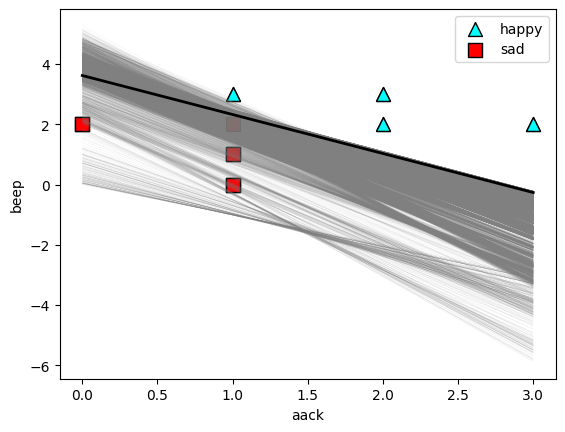

([np.float64(3.2103740996747585), np.float64(2.4809333707095265)],
 np.float64(-8.971410867848327))

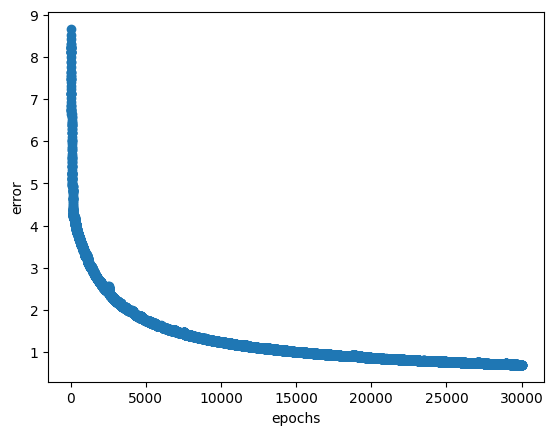

In [ ]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

plot_points(features, labels)

logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 10000)
